In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv ("C:\\Users\\disha\\Downloads\\Data.csv")

In [3]:
df

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...,...
52578,52579,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
# Cleaning column names
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.rename(columns={'general_diffuse_flows': 'General_Diffuse_Flows','diffuse_flows': 'Diffuse_Flows' }, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S_no                         52583 non-null  int64  
 1   Temperature                  52263 non-null  object 
 2   Humidity                     52558 non-null  object 
 3   Wind_Speed                   52512 non-null  object 
 4   General_Diffuse_Flows        52275 non-null  float64
 5   Diffuse_Flows                52568 non-null  float64
 6   Air_Quality_Index_(PM)       52565 non-null  float64
 7   Cloudiness                   52583 non-null  int64  
 8   Power_Consumption_in_A_Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
# Converting object columns to numeric (where applicable)
numeric_columns = ["Temperature", "Humidity", "Wind_Speed"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S_no                         52583 non-null  int64  
 1   Temperature                  52260 non-null  float64
 2   Humidity                     52557 non-null  float64
 3   Wind_Speed                   52508 non-null  float64
 4   General_Diffuse_Flows        52275 non-null  float64
 5   Diffuse_Flows                52568 non-null  float64
 6   Air_Quality_Index_(PM)       52565 non-null  float64
 7   Cloudiness                   52583 non-null  int64  
 8   Power_Consumption_in_A_Zone  52583 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


In [8]:
df.shape

(52583, 9)

In [9]:
# 5point summary
df.describe()

,S_no,Temperature,Humidity,Wind_Speed,General_Diffuse_Flows,Diffuse_Flows,Air_Quality_Index_(PM),Cloudiness,Power_Consumption_in_A_Zone
count,52583.000000,52260.000000,52557.000000,52508.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,18.827863,68.285455,1.955462,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,5.813053,15.545151,2.347947,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,14.430000,58.330000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,18.820000,69.880000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,22.910000,81.400000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,40.010000,94.800000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


# Data preparation

In [10]:
#checking for duplicate values
df.duplicated().sum()

0

# Missing values

In [11]:
# Checking missing values
df.isnull().sum()

S_no                             0
Temperature                    323
Humidity                        26
Wind_Speed                      75
General_Diffuse_Flows          308
Diffuse_Flows                   15
Air_Quality_Index_(PM)          18
Cloudiness                       0
Power_Consumption_in_A_Zone      0
dtype: int64

In [12]:
len(df)

52583

# Now, i have to fill null values in the dataset

In [13]:
# Filling missing values with mean
df.fillna(df.mean(), inplace=True)

In [14]:
# Verifying missing values are handled
df.isnull().sum()

S_no                           0
Temperature                    0
Humidity                       0
Wind_Speed                     0
General_Diffuse_Flows          0
Diffuse_Flows                  0
Air_Quality_Index_(PM)         0
Cloudiness                     0
Power_Consumption_in_A_Zone    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S_no                         52583 non-null  int64  
 1   Temperature                  52583 non-null  float64
 2   Humidity                     52583 non-null  float64
 3   Wind_Speed                   52583 non-null  float64
 4   General_Diffuse_Flows        52583 non-null  float64
 5   Diffuse_Flows                52583 non-null  float64
 6   Air_Quality_Index_(PM)       52583 non-null  float64
 7   Cloudiness                   52583 non-null  int64  
 8   Power_Consumption_in_A_Zone  52583 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


In [16]:
# Detecting and Handling Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Filtering extreme outliers (1.5*IQR rule)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45036 entries, 396 to 52582
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S_no                         45036 non-null  int64  
 1   Temperature                  45036 non-null  float64
 2   Humidity                     45036 non-null  float64
 3   Wind_Speed                   45036 non-null  float64
 4   General_Diffuse_Flows        45036 non-null  float64
 5   Diffuse_Flows                45036 non-null  float64
 6   Air_Quality_Index_(PM)       45036 non-null  float64
 7   Cloudiness                   45036 non-null  int64  
 8   Power_Consumption_in_A_Zone  45036 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.4 MB


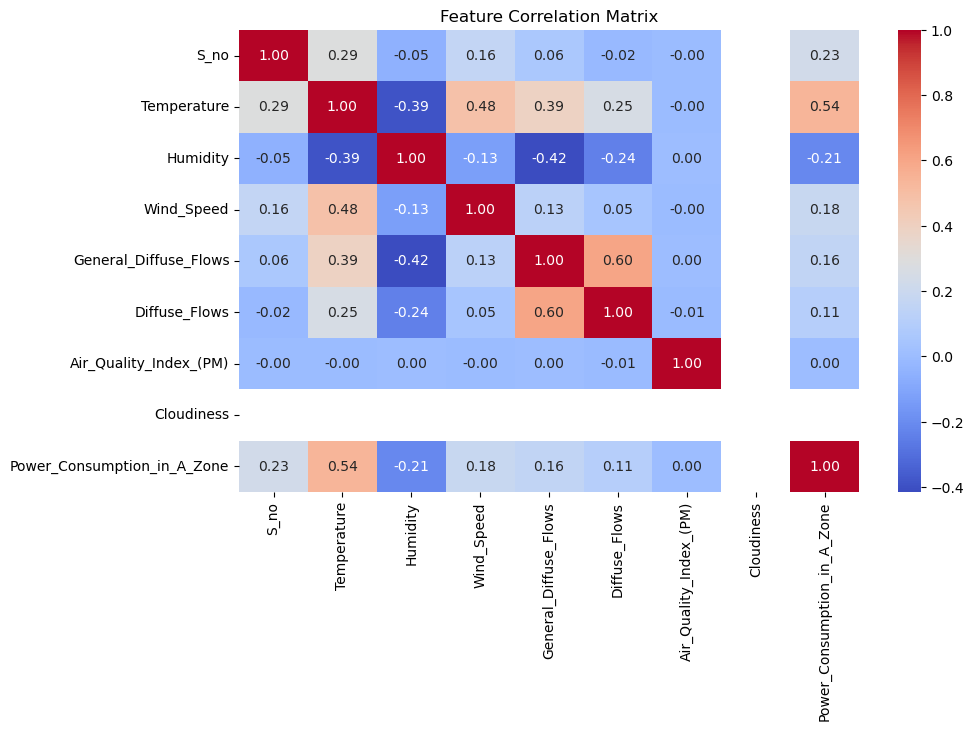

In [19]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

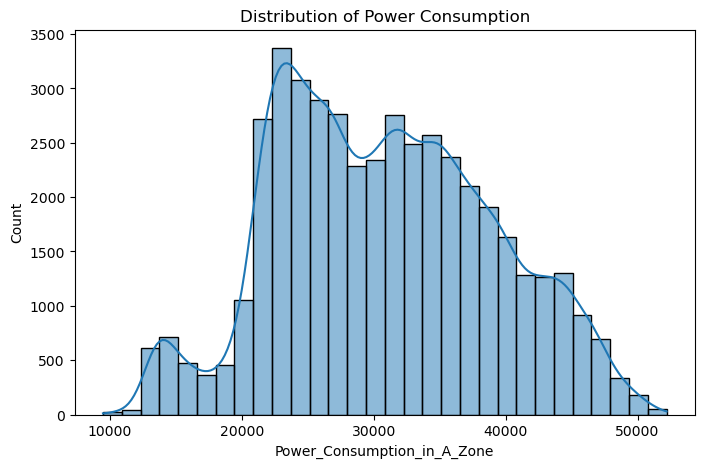

In [20]:
# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['Power_Consumption_in_A_Zone'], kde=True, bins=30)
plt.title("Distribution of Power Consumption")
plt.show()

# Feature Engineering

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
df.columns

Index(['S_no', 'Temperature', 'Humidity', 'Wind_Speed',
       'General_Diffuse_Flows', 'Diffuse_Flows', 'Air_Quality_Index_(PM)',
       'Cloudiness', 'Power_Consumption_in_A_Zone'],
      dtype='object')

In [23]:
# Feature selection (removing serial number column)
X = df.drop(columns=["S_no", "Power_Consumption_in_A_Zone"])
y = df["Power_Consumption_in_A_Zone"]

In [24]:
X

,Temperature,Humidity,Wind_Speed,General_Diffuse_Flows,Diffuse_Flows,Air_Quality_Index_(PM),Cloudiness
396,18.827863,69.56,0.075,182.964247,11.930,157.0,0
397,18.827863,70.90,0.076,182.964247,6.887,151.0,0
398,18.827863,72.10,0.076,182.964247,3.349,151.0,0
399,18.827863,73.00,0.074,182.964247,1.087,158.0,0
400,18.827863,73.70,0.075,182.964247,0.189,153.0,0
...,...,...,...,...,...,...,...
52578,18.827863,75.60,0.094,436.200000,38.960,157.0,0
52579,18.827863,73.50,0.089,451.600000,37.730,157.0,0
52580,18.827863,70.10,0.085,466.400000,37.490,157.0,0
52581,18.827863,67.75,0.086,477.000000,37.370,152.0,0


In [25]:
y

396      27209.72644
397      27300.91185
398      27257.14286
399      27279.02736
400      27235.25836
            ...     
52578    34444.55696
52579    34438.48101
52580    33873.41772
52581    33988.86076
52582    34158.98734
Name: Power_Consumption_in_A_Zone, Length: 45036, dtype: float64

In [26]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
X.shape

(45036, 7)

In [29]:
X_train.shape

(36028, 7)

In [30]:
X_test.shape

(9008, 7)

In [31]:
# Model training using Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [34]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
print(f"Model Performance:\nMean Squared Error: {mse}\nR-Squared Score: {r2}")

Model Performance:
Mean Squared Error: 25987191.114683907
R-Squared Score: 0.6186993467669248
